# Exploratory Data Analysis

## Objectives
* Show a basic description of the features' statistics.
* Show the distributions of the features.
* Show distributions of the features when split by class.
* Check for multicolinearity.
* Check for outliers
* Form hypotheses about the data.

I will start off by importing the necessary libraries.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd # dataframes
import matplotlib.pyplot as plt # visializations
import seaborn as sns # visualizations
from scipy.stats import zscore, iqr
import pickle

import warnings
warnings.filterwarnings("ignore")

Now I will load the .csv file into a dataframe and preview it.

## Pandas & Pickle

In [4]:
# Load dataframe and preview it
pickle_in = open("clean_data.pickle", "rb")
df = pickle.load(pickle_in)
pickle_in.close()

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Now I will save the Class column as 'target' and all the other columns as 'feats'

In [5]:
# Save the Class column as 'target' and all the other columns as 'feats'
target = df.Class
feats = df.drop('Class', axis=1)

#### Show the distribution of the classes

In [6]:
# Show the ratio between the two classes
target.value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

## Matplotlib

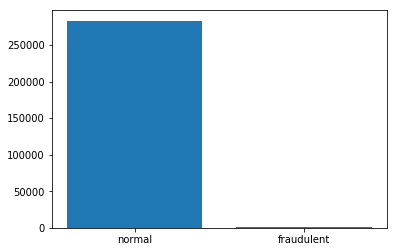

In [7]:
# Visualy show the differences between classes
classes = ['normal', 'fraudulent']
amounts = target.value_counts()
plt.bar(classes, amounts);

This dataset is highly imbalanced.

#### Show a basic description of the features' statistics

In [8]:
# Show features basic statistics
feats.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


Time and Amount are on a completely different scales than the the other features.

#### Show the distributions of the features

Now I will create histograms and kernel density estimation plots to show the distribution of each feature.

## Seaborn

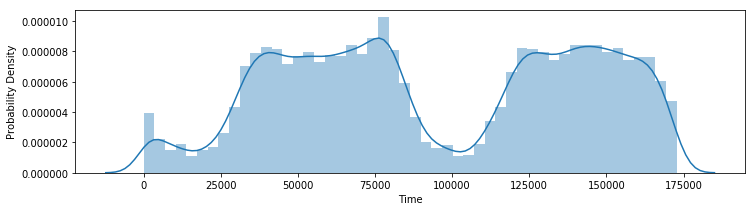

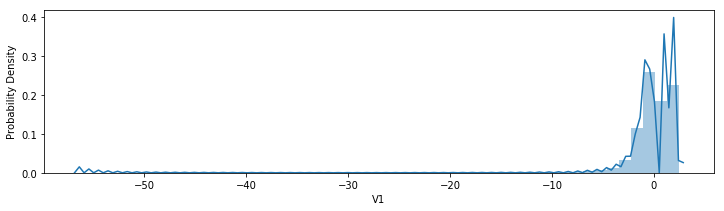

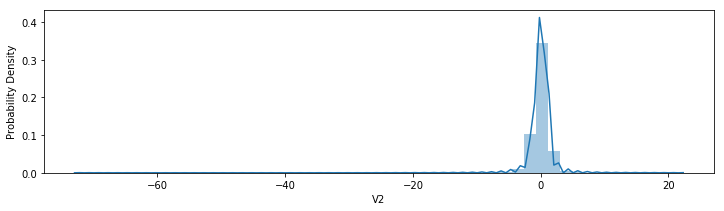

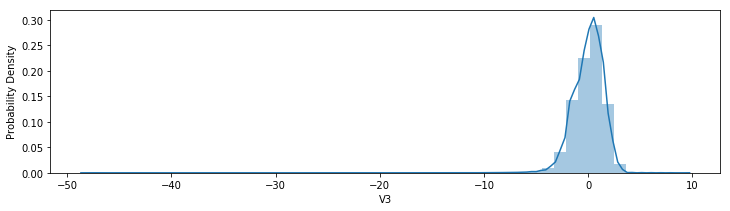

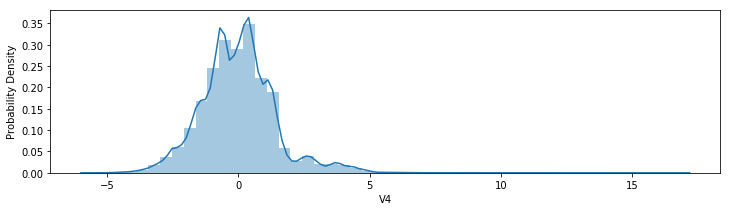

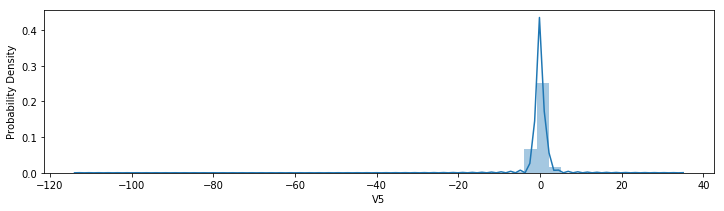

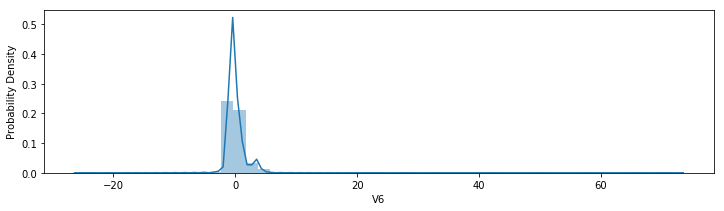

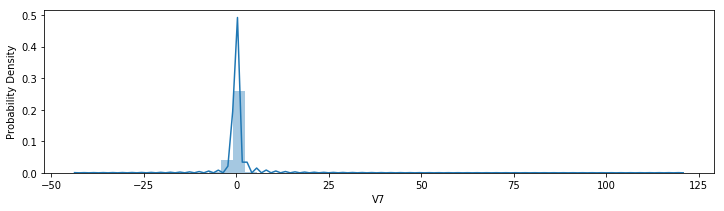

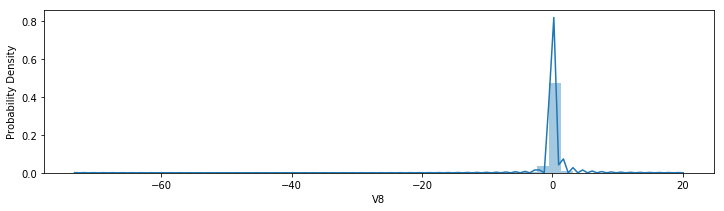

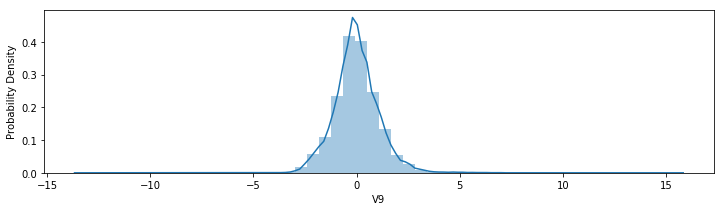

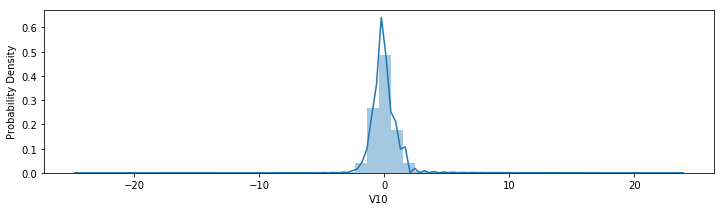

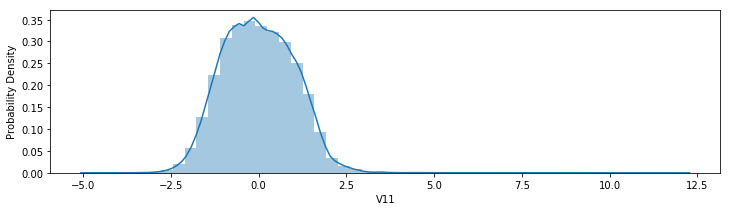

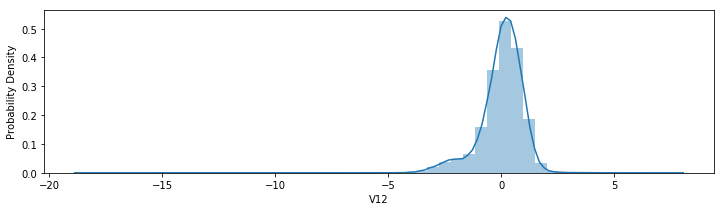

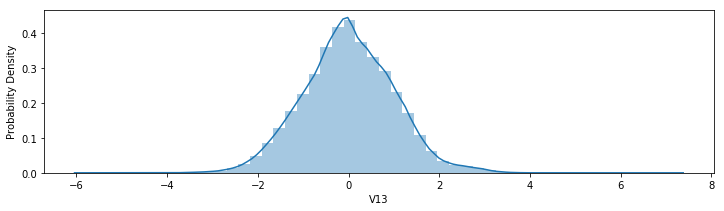

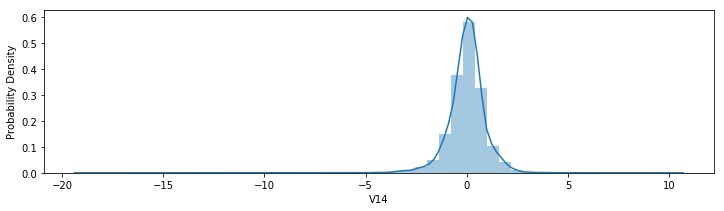

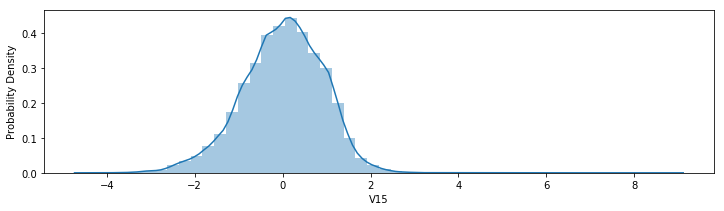

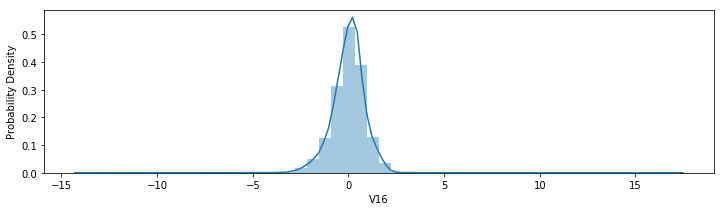

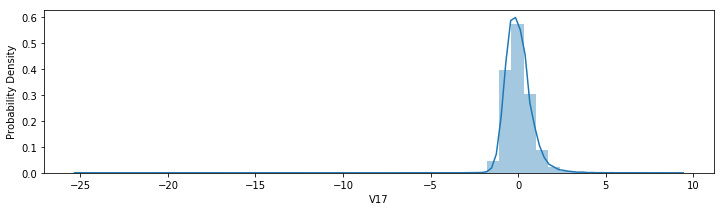

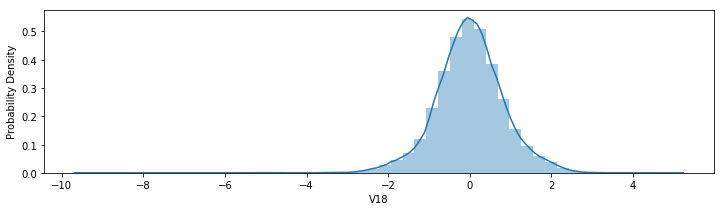

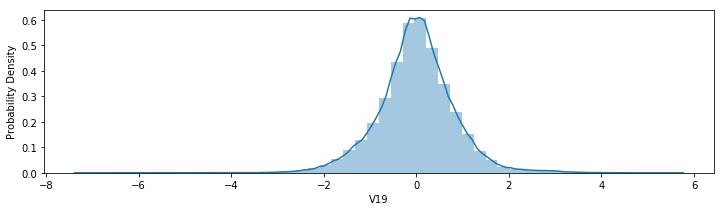

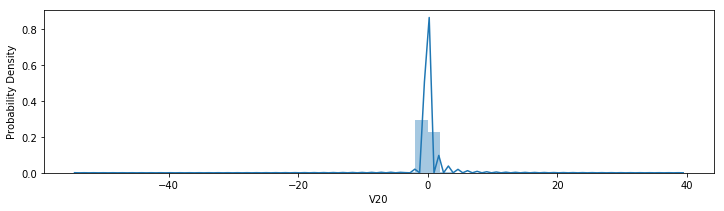

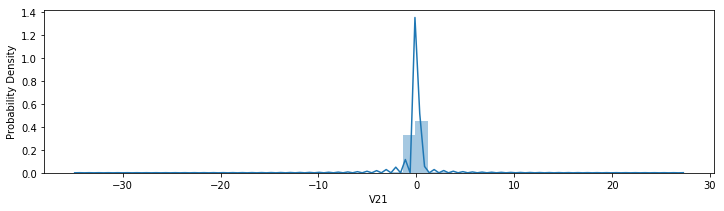

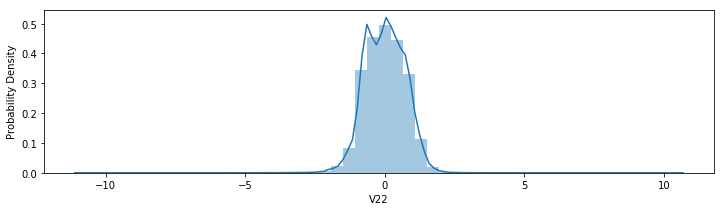

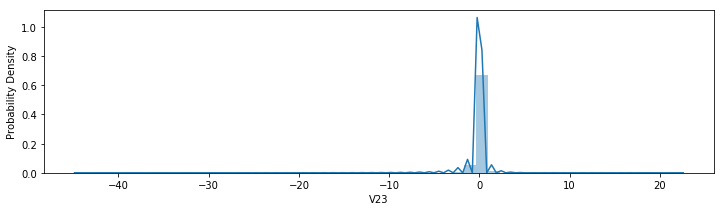

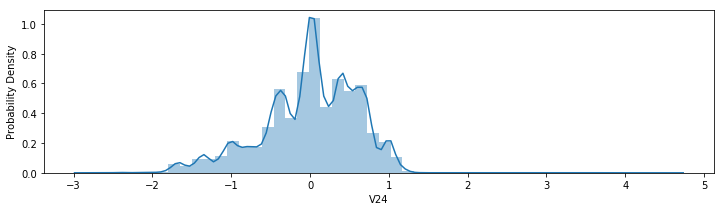

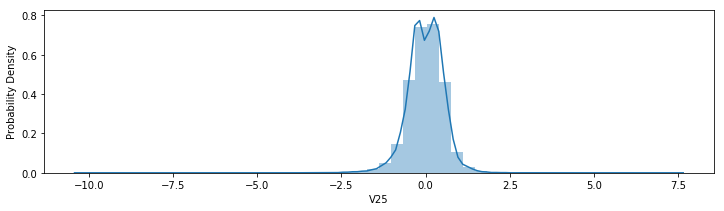

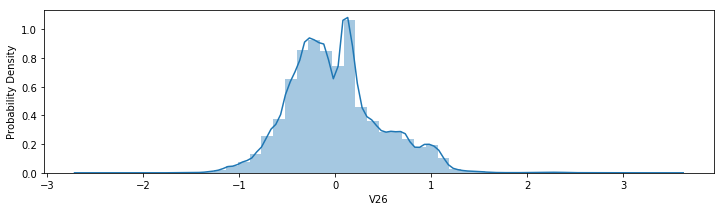

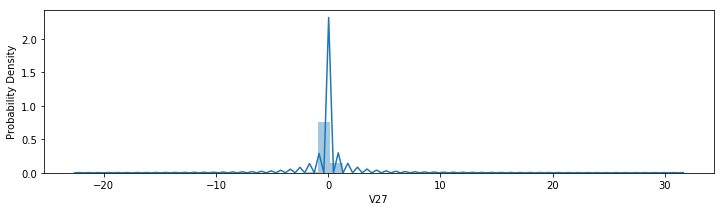

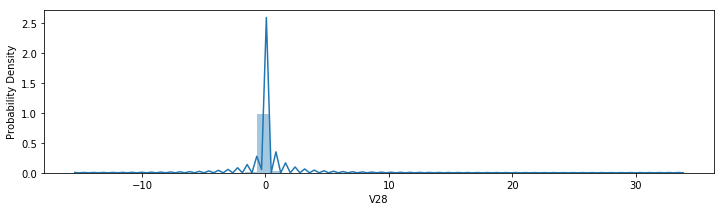

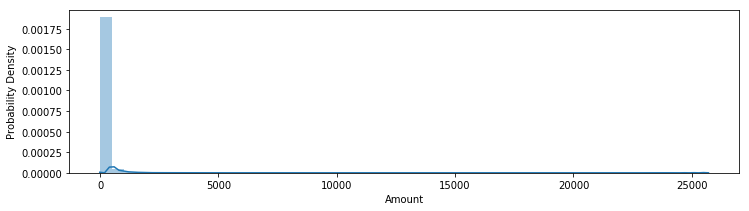

In [9]:
# Plot histograms and KDEs for each feature
for col in feats:
    plt.figure(figsize=(12,3))
    plt.ylabel('Probability Density')
    sns.distplot(df[col])
    plt.show()

There is alot of variance in the in all of the features except time.

#### Show distributions of the features when split by class

Now I will show the distribution of the features when split by class. I will use histograms and kernel density estimation plots again. I will plot vertical lines for the maximum and minimum values for each set to show where they lie.

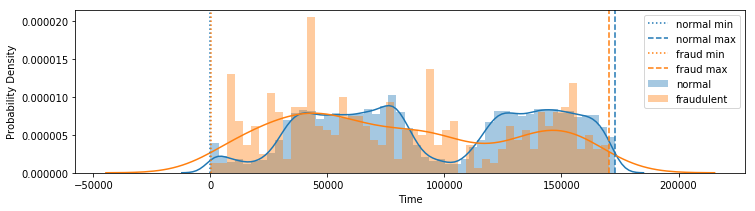

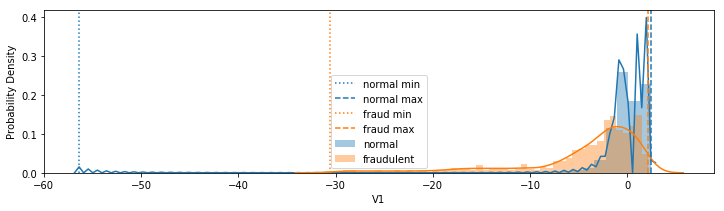

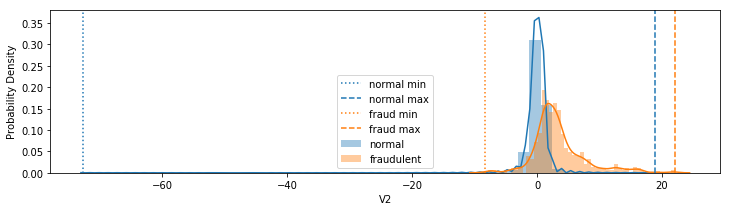

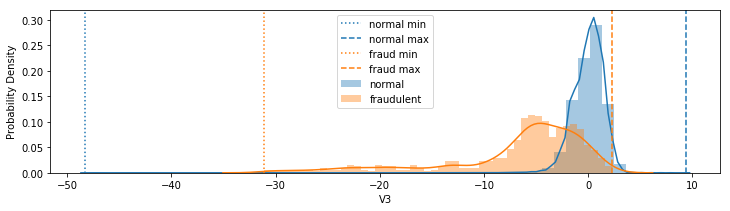

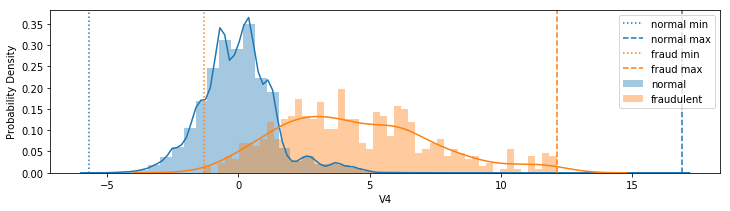

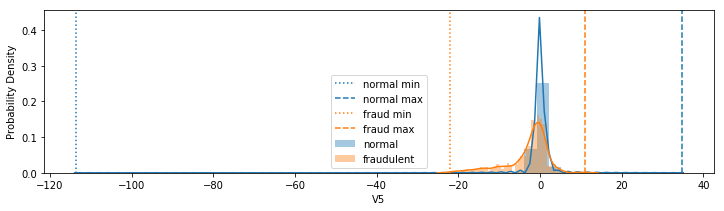

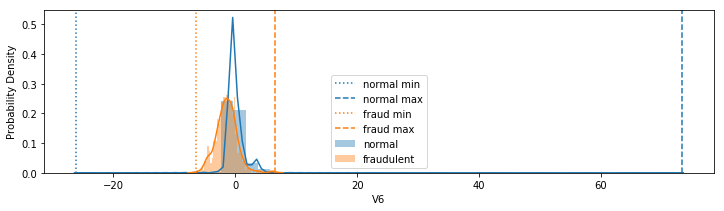

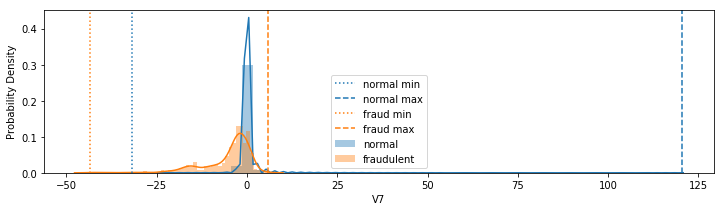

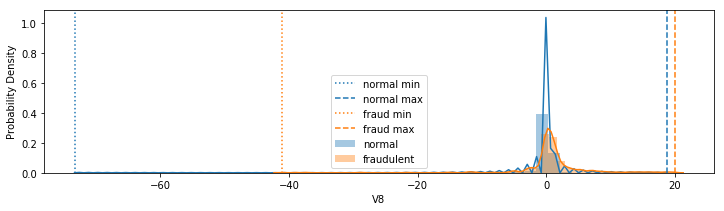

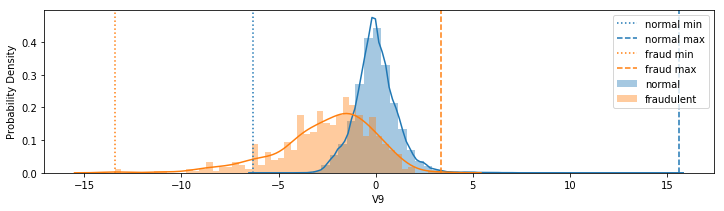

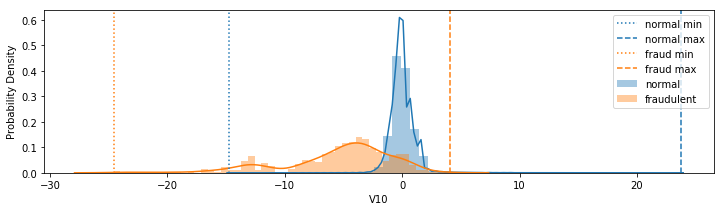

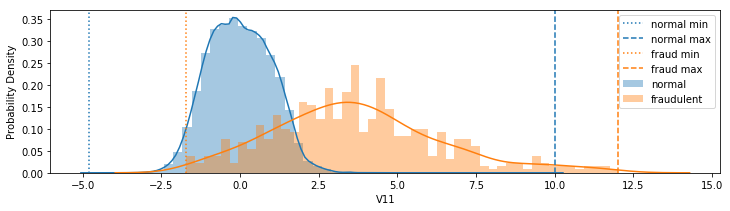

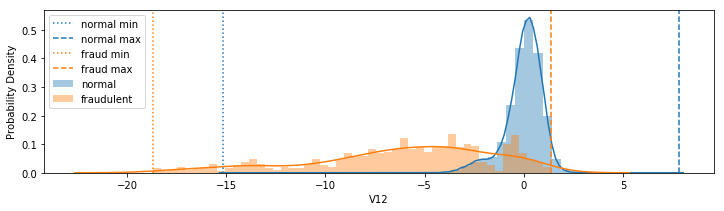

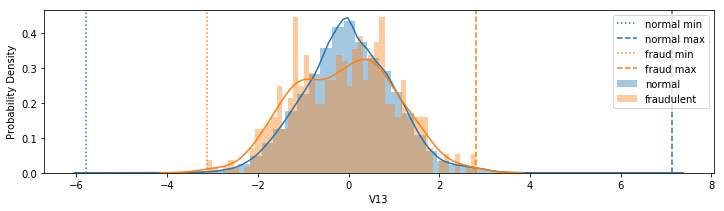

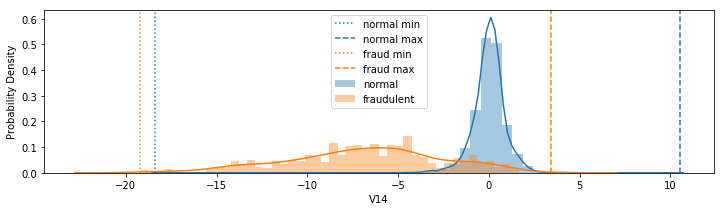

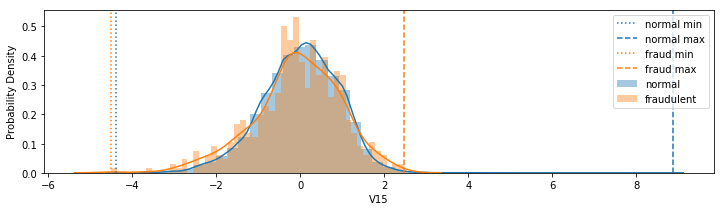

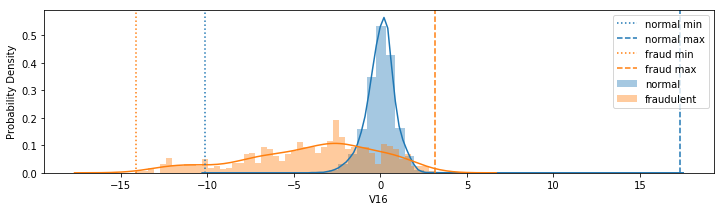

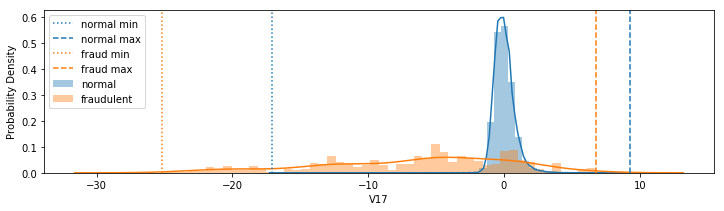

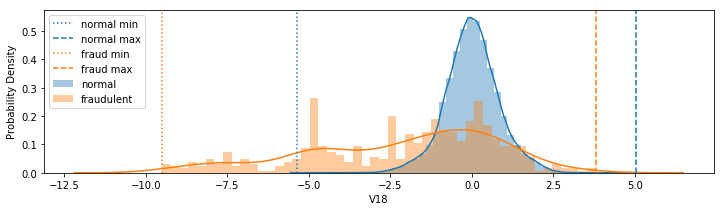

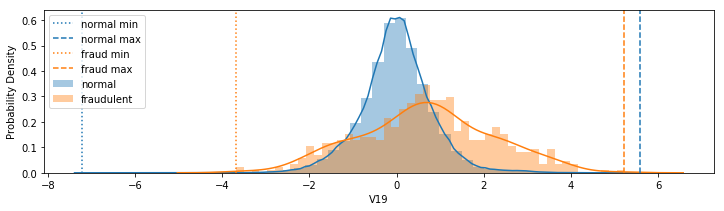

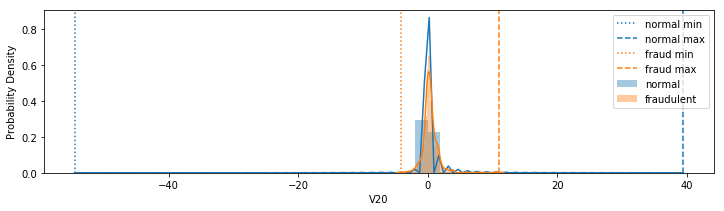

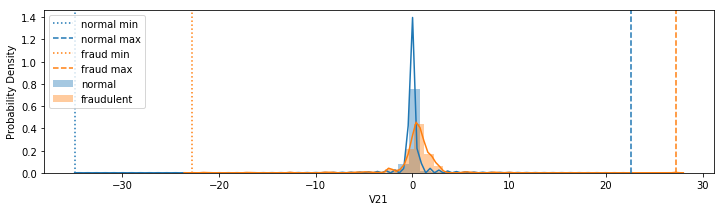

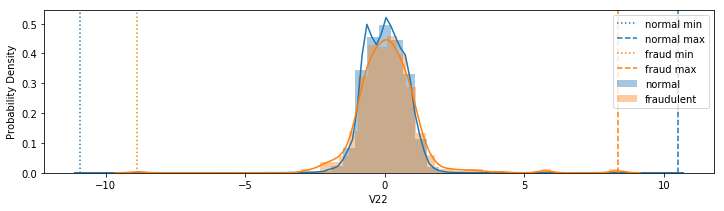

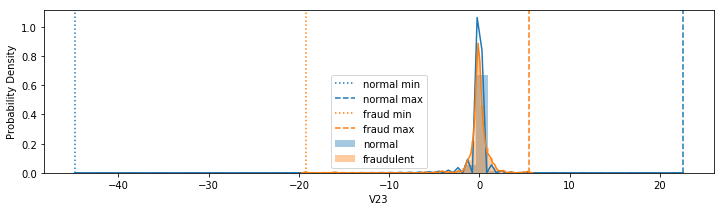

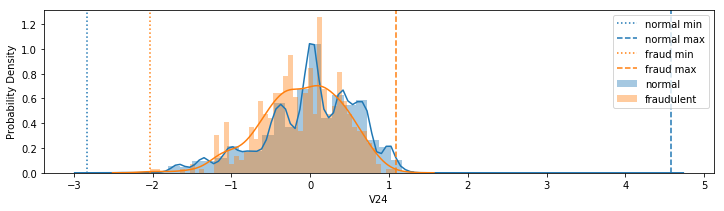

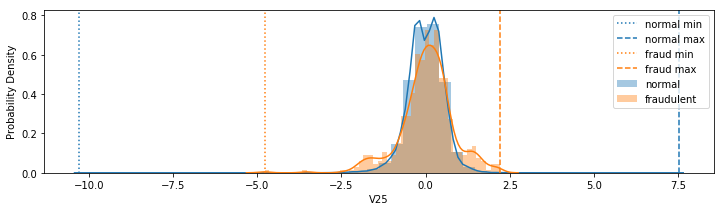

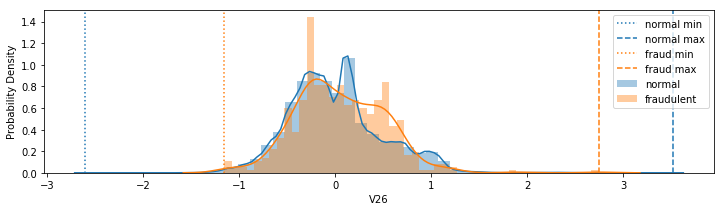

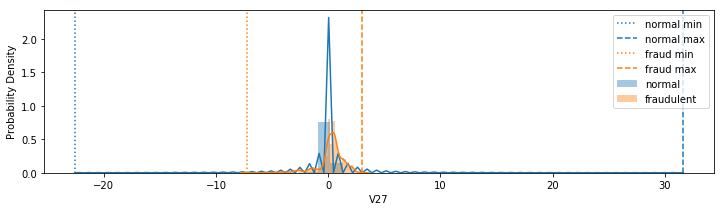

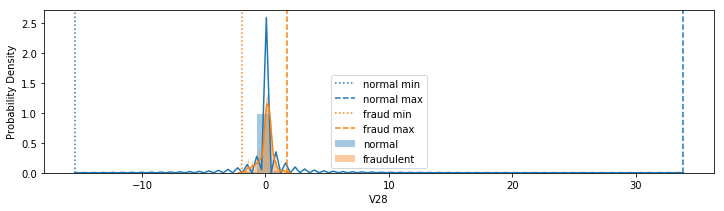

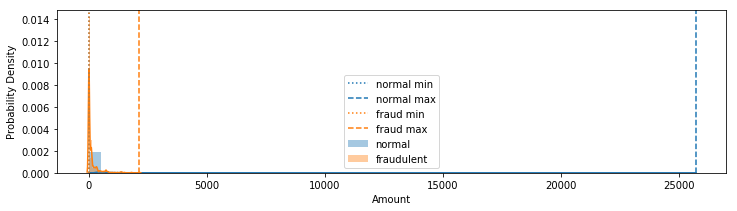

In [10]:
# Split each feature by class and then plot histograms and KDEs
for col in feats:
    x0 = df[target == 0][col]
    x1 = df[target == 1][col]
    plt.figure(figsize=(12,3))
    plt.ylabel('Probability Density')
    sns.distplot(x0, bins=50, label='normal')
    sns.distplot(x1, bins=50, label='fraudulent')
    
    # Plot vertical lines
    plt.axvline(x0.min(), label='normal min', linestyle=':')
    plt.axvline(x0.max(), label='normal max', linestyle='--')
    plt.axvline(x1.min(), label='fraud min', color='C1', linestyle=':')
    plt.axvline(x1.max(), label='fraud max', color='C1', linestyle='--')
    
    
    plt.legend()
    plt.show()

There are two things to notice here:
* There are times of day when the ratio between normal and fraudlent activity varies largely.
* Principal component features 1, 5, 6, 8, 13, 15, 20, 21, 22, 23, 24, 25, and 26 do not seem to vary much when split by classes.


#### Check for multicolinearity

First I will show the correlation between features using a heatmap

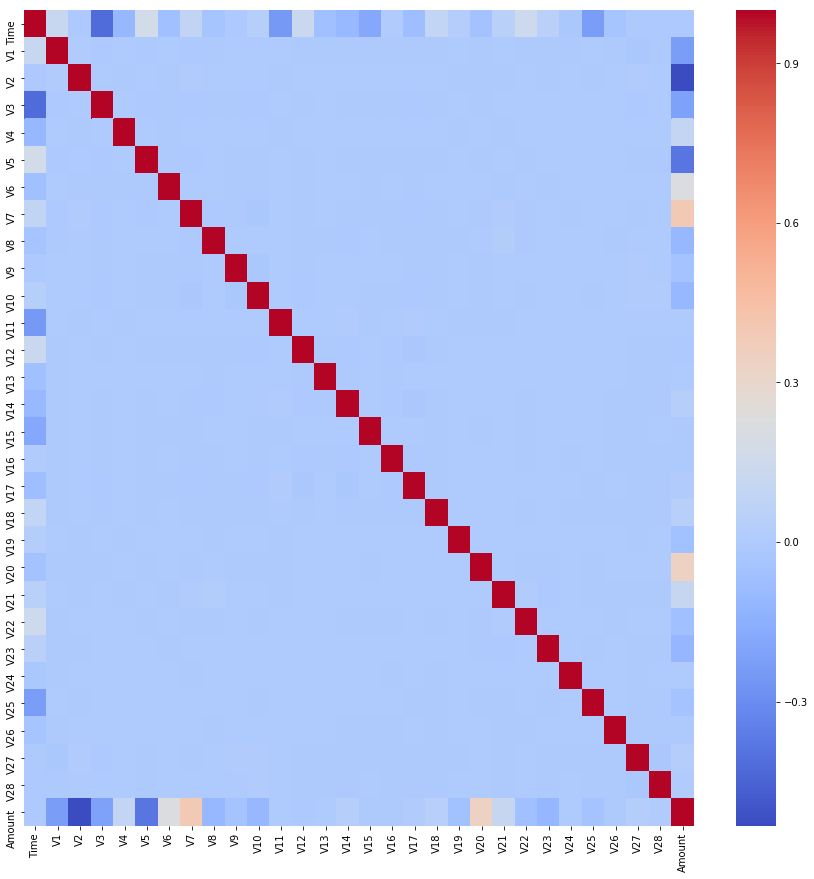

In [11]:
# Plot continous heatmap
plt.figure(figsize=(15,15))
sns.heatmap(feats.corr(), cmap='coolwarm');

There is very little correlation between features.

#### Check for outliers

In this section I will check for outliers based on zscore and inter-quartile range. I refreshed myself on how to check for these outliers using this <a href='https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba'>blog post</a> that I listed as source 1. 

I wil now plot each feature along where the boundiries are for outliers based on an absolute zscore of 3 and 4. I will also plot the boundaries for outliers based on 1.5 IQR. I will also count the outliers by each measure.

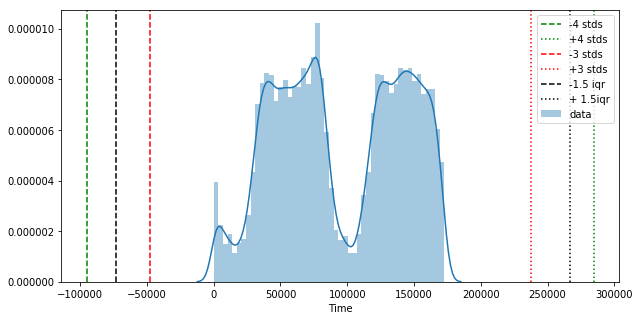

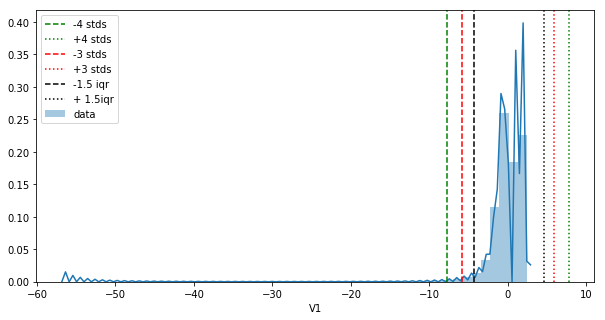

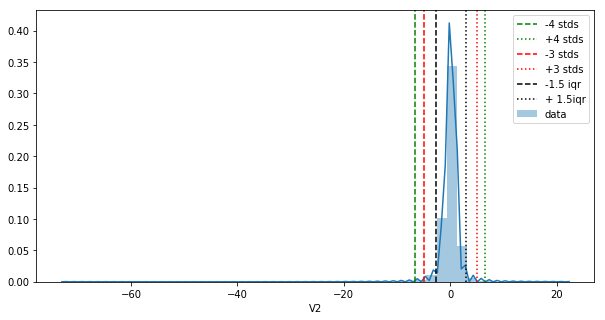

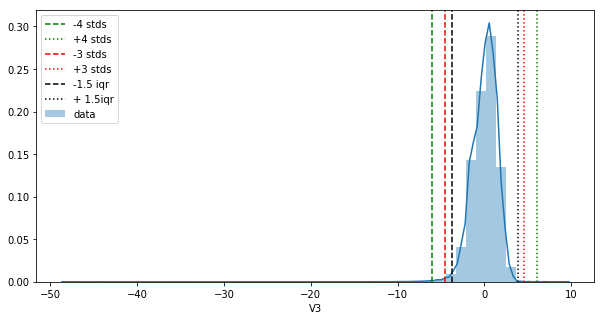

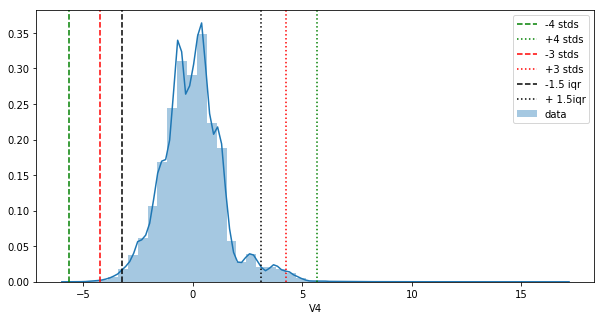

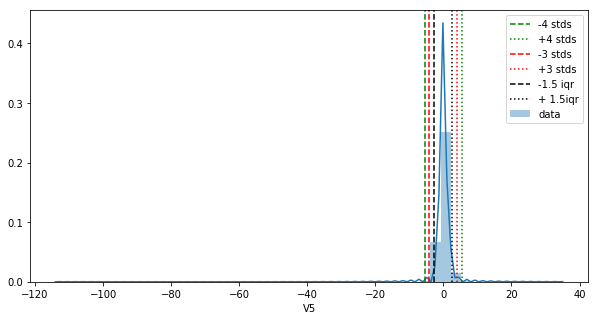

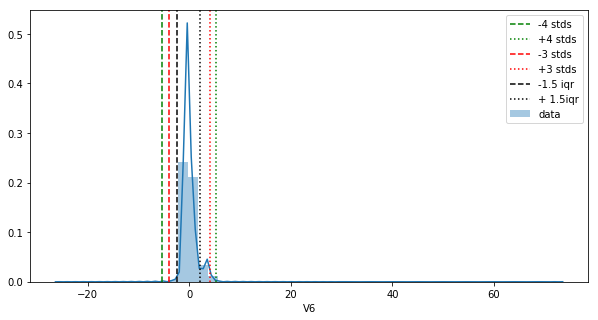

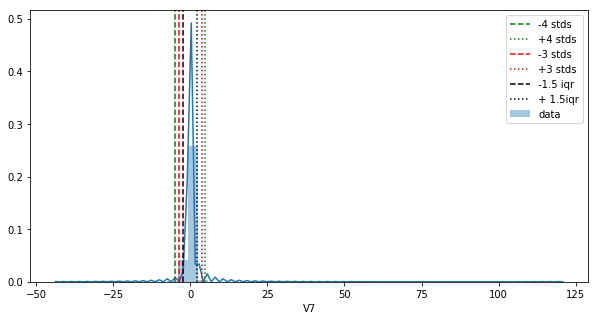

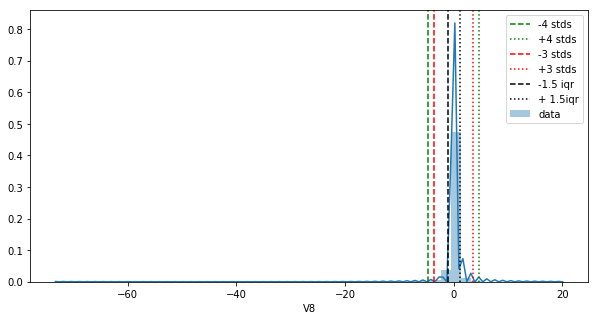

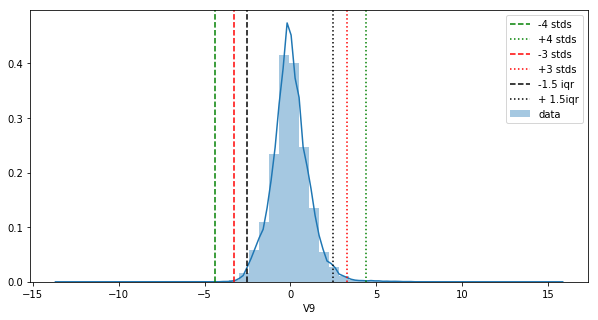

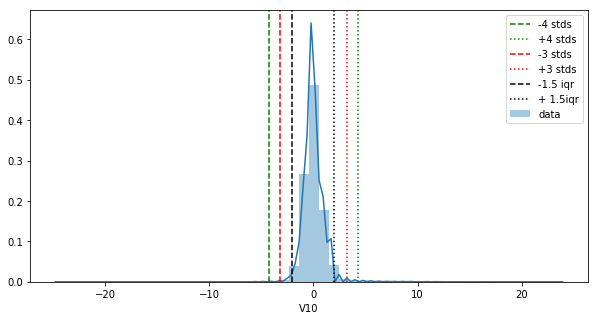

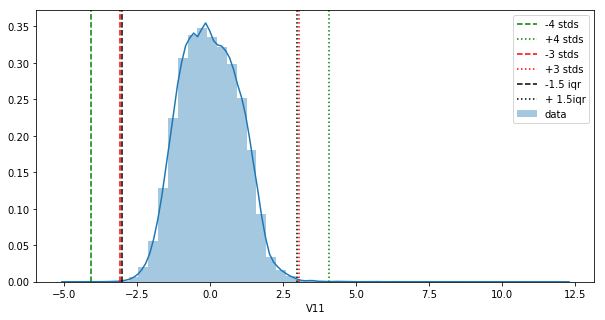

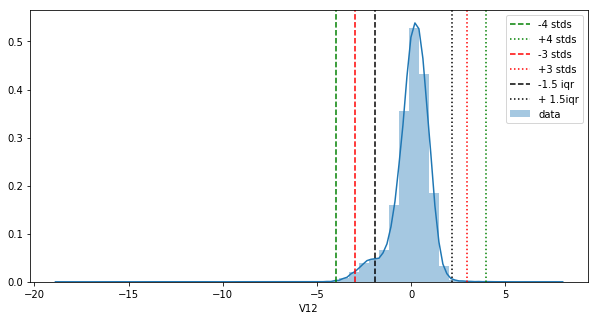

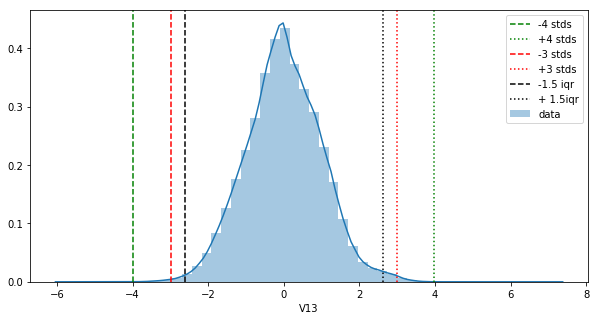

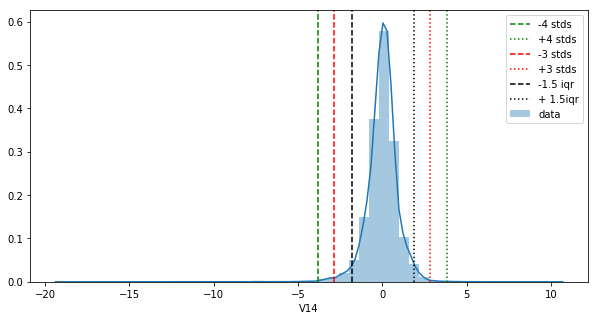

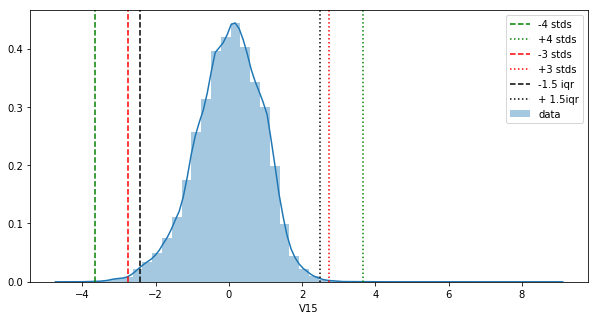

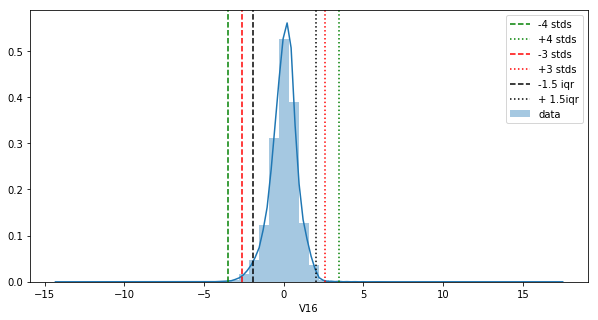

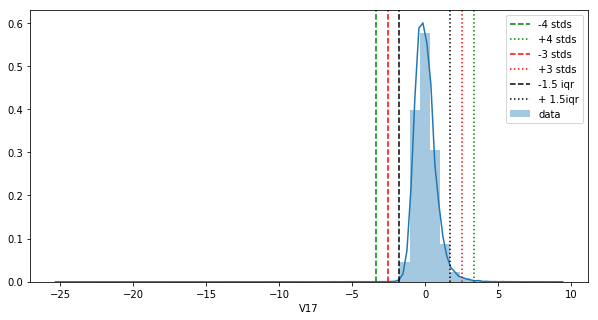

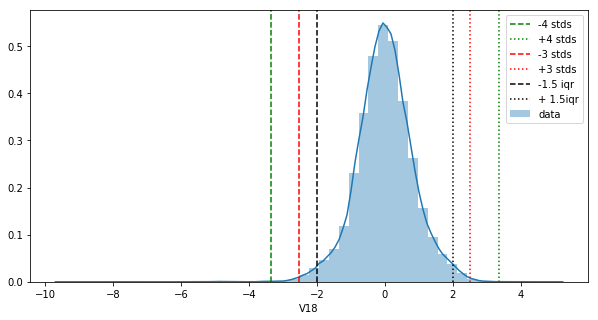

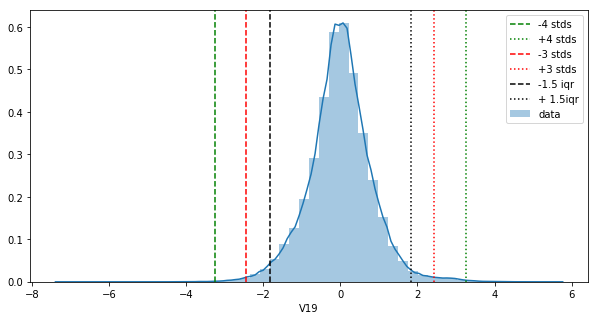

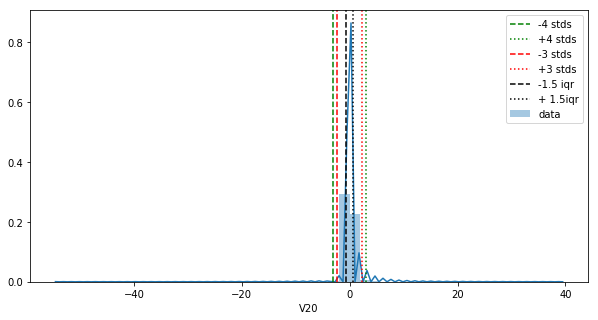

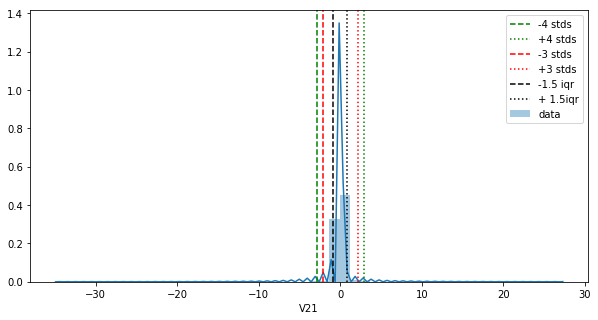

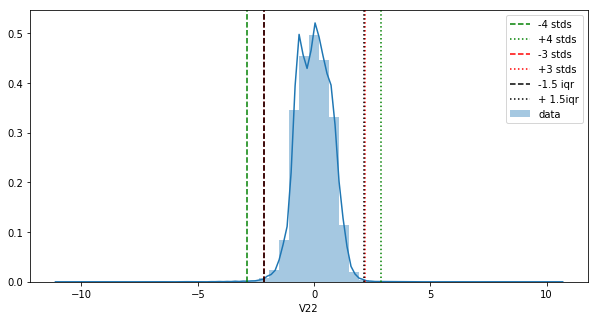

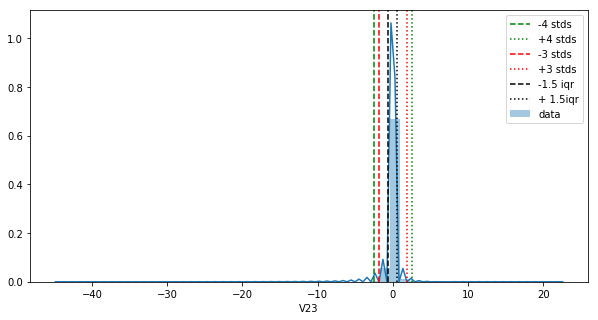

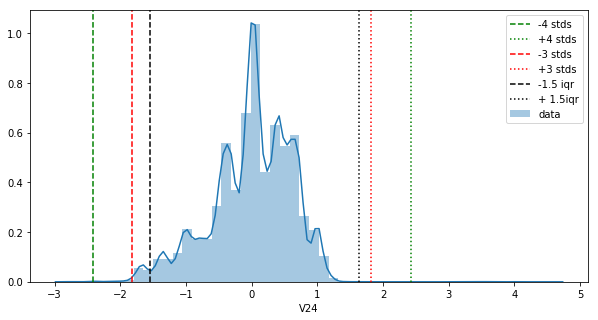

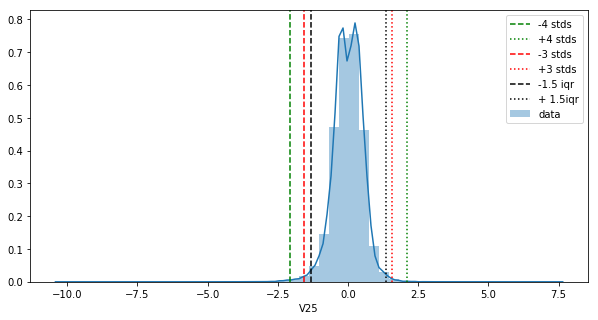

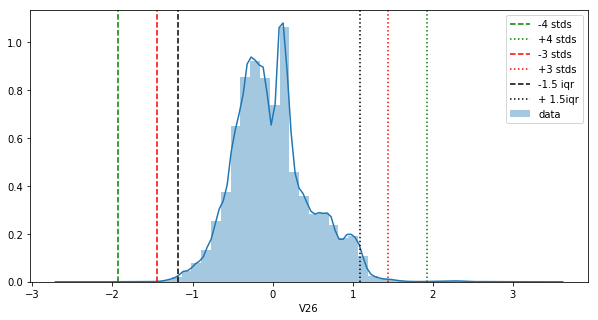

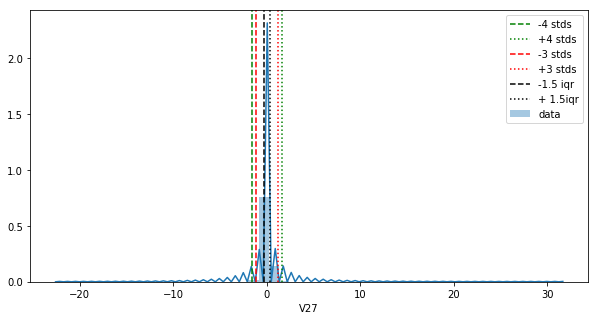

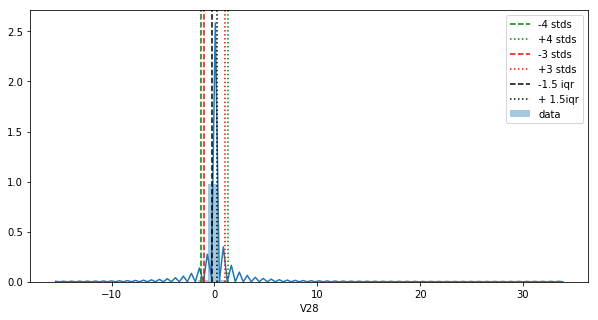

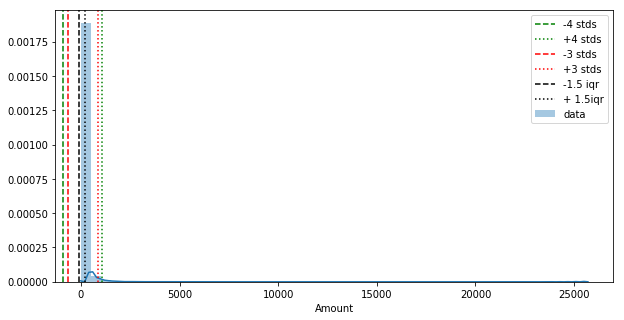

In [12]:
# Plot every feature 
# Plot the boundary for outliers based on zscore
# Plot the boundary for outliers based on interquartile range
# Count outliers

# Plot every feature
for col in feats:
    plt.figure(figsize=(10, 5))
    sns.distplot(feats[col], label='data')
    
    # Plot boundarys
    bn4 = np.mean(feats[col]) - 4*np.std(feats[col])
    bp4 = np.mean(feats[col]) + 4*np.std(feats[col])
    bn3 = np.mean(feats[col]) - 3*np.std(feats[col])
    bp3 = np.mean(feats[col]) + 3*np.std(feats[col])
    iqr15n = feats[col].quantile(0.25) - 1.5*iqr(feats[col])
    iqr15p = feats[col].quantile(0.75) + 1.5*iqr(feats[col])
    
    for boundary, color, label, linestyle in zip([bn4, bp4, bn3, bp3, iqr15n, iqr15p],
                               ['green', 'green', 'red', 'red', 'black', 'black'],
                               ['-4 stds', '+4 stds', '-3 stds', '+3 stds', '-1.5 iqr', '+ 1.5iqr'],
                               ['--', ':', '--', ':', '--', ':']):
        plt.axvline(boundary, color=color, label=label, linestyle = linestyle)
        
    # Finish plot
    plt.legend()
    plt.show()

In [13]:
ol3_indices = []
ol4_indices = []
oliqr_indices = []

for col in feats: 
    # Count outliers for each measure
    ol3 = feats[abs(zscore(feats[col])) > 3]
    ol4 = feats[abs(zscore(feats[col])) > 4]
    oliqr = feats[(feats[col] < feats[col].quantile(0.25) - 1.5*iqr(feats[col])) | 
                      (feats[col] > feats[col].quantile(0.75) + 1.5*iqr(feats[col]))]
    
    # Print out the counts
    print("{} has {} values outside 3 standard deviations from the mean".format(col, len(ol3)))
    print("{} has {} values outside 4 standard deviations from the mean".format(col, len(ol4)))
    print("{} has {} values outside 1.5 Interquartile ranges from the first and third quartile".format(col, len(oliqr)))
    
    # Print out percents
    print("{} is %{} outliers (std3)".format(col, 100*len(ol3)/len(df)))
    print("{} is %{} outliers (std4)".format(col, 100*len(ol4)/len(df)))
    print("{} is %{} outliers (iqr)".format(col, 100*len(oliqr)/len(df)))
    
    for ele in ol3.index:
        ol3_indices.append(ele)
        
    for ele in ol4.index:
        ol4_indices.append(ele)
        
    for ele in oliqr.index:
        oliqr_indices.append(ele)
        
print("Total amount of outliers by 3 std: {}, %{}".format(len(set(ol3_indices)), 100*len(set(ol3_indices))/len(df)))

print("Total amount of outliers by 4 std: {}, %{}".format(len(set(ol4_indices)), 100*len(set(ol4_indices))/len(df)))

print("Total amount of outliers by 1.5 IQR: {}, %{}".format(len(set(oliqr_indices)), 100*len(set(oliqr_indices))/len(df)))

Time has 0 values outside 3 standard deviations from the mean
Time has 0 values outside 4 standard deviations from the mean
Time has 0 values outside 1.5 Interquartile ranges from the first and third quartile
Time is %0.0 outliers (std3)
Time is %0.0 outliers (std4)
Time is %0.0 outliers (iqr)
V1 has 3647 values outside 3 standard deviations from the mean
V1 has 1842 values outside 4 standard deviations from the mean
V1 has 6948 values outside 1.5 Interquartile ranges from the first and third quartile
V1 is %1.2853950642521306 outliers (std3)
V1 is %0.6492179074177199 outliers (std4)
V1 is %2.4488414879143963 outliers (iqr)
V2 has 4303 values outside 3 standard deviations from the mean
V2 has 2168 values outside 4 standard deviations from the mean
V2 has 13390 values outside 1.5 Interquartile ranges from the first and third quartile
V2 is %1.5166040475670188 outliers (std3)
V2 is %0.7641174936382285 outliers (std4)
V2 is %4.719341900284077 outliers (iqr)
V3 has 1953 values outside 3 st

V26 has 1044 values outside 3 standard deviations from the mean
V26 has 516 values outside 4 standard deviations from the mean
V26 has 5665 values outside 1.5 Interquartile ranges from the first and third quartile
V26 is %0.3679606380804015 outliers (std3)
V26 is %0.18186560272939384 outliers (std4)
V26 is %1.9966446501201864 outliers (iqr)
V27 has 4775 values outside 3 standard deviations from the mean
V27 has 2838 values outside 4 standard deviations from the mean
V27 has 38799 values outside 1.5 Interquartile ranges from the first and third quartile
V27 is %1.6829617306838287 outliers (std3)
V27 is %1.000260815011666 outliers (std4)
V27 is %13.674813023832852 outliers (iqr)
V28 has 3236 values outside 3 standard deviations from the mean
V28 has 1794 values outside 4 standard deviations from the mean
V28 has 30094 values outside 1.5 Interquartile ranges from the first and third quartile
V28 is %1.1405369969618575 outliers (std3)
V28 is %0.6323001769312647 outliers (std4)
V28 is %10.6

## Sources
1) Blog post on detecting outliers https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba